## Algorytm symulowanego wyżarzania - Simulated Annealing Algorithm


Symulowane wyżarzanie – jedna z technik projektowania algorytmów heurystycznych (metaheurystyka). Cechą charakterystyczną tej metody jest występowanie parametru sterującego zwanego temperaturą, który maleje w trakcie wykonywania algorytmu. Im wyższą wartość ma ten parametr, tym bardziej chaotyczne mogą być zmiany. Podejście to jest inspirowane zjawiskami obserwowanymi w metalurgii – im większa temperatura metalu, tym bardziej jest on plastyczny.

Jest to metoda iteracyjna: najpierw losowane jest pewne rozwiązanie, a następnie jest ono w kolejnych krokach modyfikowane. Jeśli w danym kroku uzyskamy rozwiązanie lepsze, wybieramy je zawsze. Istotną cechą symulowanego wyżarzania jest jednak to, że z pewnym prawdopodobieństwem może być również zaakceptowane rozwiązanie gorsze (ma to na celu umożliwienie wyjście z maksimum lokalnego).

Prawdopodobieństwo przyjęcia gorszego rozwiązania wyrażone jest wzorem e(f(X)−f(X'))/T (rozkład Boltzmanna), gdzie X jest poprzednim rozwiązaniem, X' nowym rozwiązaniem, a f funkcją oceny jakości – im wyższa wartość f(X), tym lepsze rozwiązanie. Ze wzoru można zauważyć, że prawdopodobieństwo przyjęcia gorszego rozwiązania spada wraz ze spadkiem temperatury i wzrostem różnicy jakości obu rozwiązań.

##### Działanie algorytmu można opisać następująco:

1. Wylosuj rozwiązanie początkowe X.
2. Wybierz losowe rozwiązanie X' znajdujące się w pobliżu X.
3. Jeśli nowe rozwiązanie jest lepsze, przyjmij je (X=X'). W przeciwnym razie, wyznacz prawdopodobieństwo przyjęcia nowego rozwiązania używając wzoru e(f(X)−f(X'))/T. Następnie wylosuj liczbę z przedziału [0,1] i jeśli jest ona mniejsza od obliczonego prawdopodobieństwa, przyjmij nowe rozwiązanie (pomimo tego, że jest gorsze).
4. Jeśli nie wykonano jeszcze odpowiedniej liczby prób w obrębie danej epoki, wróć do punktu 2.
5. Zmniejsz temperaturę.
6. Jeśli nie osiągnięto jeszcze warunku stopu, wróć do punktu 2.

Źródło: http://algorytmy.ency.pl/artykul/symulowane_wyzarzanie

## Znajdowanie minimum funkcji za pomocą algorytmu SA. 

In [23]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np

In [64]:
def func(x):
       return 3 * np.sin(math.pi * x / 5) + np.sin(math.pi * x)
      # return x**2 -6*x +9

def wyzarzanie(initial_temp, coef_temp , epochs,tries, _range):
    a, b = _range
    for epoch in range(epochs):
        temp = initial_temp 
        for _try in range(tries):
            x0 = random.uniform(a, b)
            x1 = x0 + random.uniform(-1,1)

            if x1 < a or x1 > b:
                continue
            delta = func(x1) - func(x0)
            if delta < 0:
                    x0 = x1
            else:
                    p = math.exp(-delta/temp)
                    if random.uniform(0, 1) < p:
                        x0 = x1
            temp *= coef_temp
            
            
            print("Epoka {}, próba {}: x0 = {:.2f}, f(x0) = {:.2f}".format(epoch+1, _try+1, x0, func(x0)))



In [65]:
initial_temp = 1.0
coef_temp = 0.9
epochs= 3
tries = 5
_range= (0,10)

wyzarzanie(initial_temp , coef_temp, epochs, tries, _range)


Epoka 1, próba 1: x0 = 1.10, f(x0) = 1.60
Epoka 1, próba 2: x0 = 1.03, f(x0) = 1.72
Epoka 1, próba 3: x0 = 1.90, f(x0) = 2.49
Epoka 1, próba 4: x0 = 3.54, f(x0) = 1.39
Epoka 1, próba 5: x0 = 9.10, f(x0) = -1.92
Epoka 2, próba 1: x0 = 7.46, f(x0) = -3.99
Epoka 2, próba 2: x0 = 0.65, f(x0) = 2.08
Epoka 2, próba 3: x0 = 0.02, f(x0) = 0.10
Epoka 2, próba 4: x0 = 9.13, f(x0) = -1.96
Epoka 2, próba 5: x0 = 3.53, f(x0) = 1.40
Epoka 3, próba 1: x0 = 6.99, f(x0) = -2.83
Epoka 3, próba 2: x0 = 8.07, f(x0) = -2.61
Epoka 3, próba 3: x0 = 5.42, f(x0) = -1.76
Epoka 3, próba 4: x0 = 7.11, f(x0) = -3.26


### Wykres funkcji oraz dokładne minimum funkcji 

Minimum funkcji wynosi: min (7.475, -3.996)


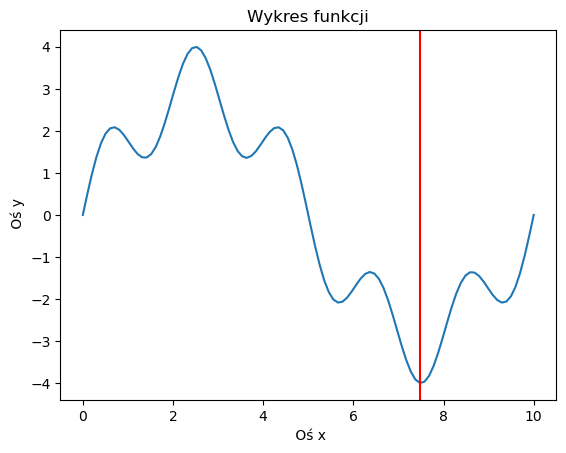

In [67]:
x= np.linspace(0,10,100)
y = func(x)

# obliczenie położenia minimum
min_x = x[np.argmin(y)]
min_y = np.min(y)

print(f"Minimum funkcji wynosi: min ({min_x:.3f}, {min_y:.3f})")

fig, ax = plt.subplots()
ax.plot(x, y)

# dodanie linii wskazującej na minimum
ax.axvline(min_x, color='red')


ax.set_title('Wykres funkcji')
ax.set_xlabel(' Oś x')
ax.set_ylabel(' Oś y')

plt.show()


## Rozwiązywanie problemu komiwojażera za pomocą algorytmu SA. 

In [1]:
import random
from math import *
import numpy as np


In [11]:
# funkcja konwertuje długosc i szerokosc geograficzną na wspólrzędne x,y,z
def latlonhtoxyzwgs84(lat,lon,h):
     a=6378137.0 #radius a of earth in meters cfr WGS84
     b=6356752.3 #radius b of earth in meters cfr WGS84
     e2=1-(b**2/a**2)
     latr=lat/90*0.5*pi #latitude in radians
     lonr=lon/180*pi #longituede in radians
     Nphi=a/sqrt(1-e2*sin(latr)**2)
     x=(Nphi+h)*cos(latr)*cos(lonr)
     y=(Nphi+h)*cos(latr)*sin(lonr)
     z=(b**2/a**2*Nphi+h)*sin(latr)
     return([x,y,z])
 
# funkcja oblicza dystans między dwoma miastami (Odległość euklidesowa)
def distance(place1, place2):
     x1, y1, z1 = place1
     x2, y2, z2 = place2
     dist = np.sqrt((x1-x2)**2 + (y1-y2)**2 + (z1-z2)**2)
     return dist



In [12]:
def total_distance(path, distances):
    total = 0
    for i in range(len(path)-1):
        total += distances[path[i]][path[i+1]]
    total += distances[path[-1]][path[0]] 
    return total



def simulated_annealing(distances, initial_temp=1.0, alpha=0.89, epochs = 3, tries = 5):
    # inicjalizacja losowej sciezki
    current_path = list(range(len(distances)))
    random.shuffle(current_path)
    current_cost = total_distance(current_path, distances)
   
    best_path = current_path.copy()
    best_cost = current_cost
 
    temperature = initial_temp
    
    for epoch in range(epochs):
        for _try in range(tries):
            
            # permutacja sąsiadów 
            neighbor = current_path.copy()
            i = random.randint(0, len(neighbor)-1)
            j = random.randint(0, len(neighbor)-1)
            neighbor[i], neighbor[j] = neighbor[j], neighbor[i]
            
            #obliczenie dystansu nowej sciezki
            neighbor_cost = total_distance(neighbor, distances)
                           
             # rozkład bolzmanna, decyzja akceptacji czy odrzucenia
            delta = neighbor_cost - current_cost
            if delta < 0 or random.random() < np.exp(-delta/temperature):
                current_path = neighbor
                current_cost = neighbor_cost
                       
              # Uaktualnienie najlepszej sciezki
            if current_cost < best_cost:
                best_path = current_path.copy()
                best_cost = current_cost
                  
            temperature *= alpha
            
            print("Epoka {}, próba {}:  Ścieżka = {}, Dystans = {:.3f}".format(epoch+1, _try+1,best_path, best_cost))

    return best_path, best_cost

In [13]:
# miasta Aleksandrów Kujawski- indeks 0  Toruń - indeks 10
places = [("Aleksandrow Kujawski", 52.880, 18.700),
          ("Aleksandrow Lodzki", 51.820, 19.299),
          ("Barlinek", 52.999, 15.199),
          ("Bielsko-Biala", 49.819, 19.049),
          ("Płock", 52.550, 19.700),
          ("Darłowo", 54.419, 16.410),
          ("Gostynin", 53.430, 19.430),
          ("Inowroclaw", 52.780, 18.249),
          ("Jawor", 51.060, 16.200),
          ("Kostrzyn", 52.589, 14.649),
          ("Toruń", 53.020, 18.609)]
         

# lista city_coords przechowuje nazwy miast i ich koordynaty (x,y,z)
city_coords = []

for place in places:
    x,y,z = latlonhtoxyzwgs84(place[1], place[2], 0)
    city_coords.append((place[0], x, y, z))
    
#  distances jest macierzą sąsiedztwa
distances = []

for i in range(len(city_coords)):
    row = []
    for j in range(len(city_coords)):
        dist = distance(city_coords[i][1:], city_coords[j][1:]) / 1000
        row.append(round(dist, 3))
    distances.append(row)

In [15]:
print("\nLista miast")
i=0
for place in places:
    print(i,place[0])
    i=i+1
    

print("\nMacierz sąsiedztwa\n")
for row in distances:
    for distance in row:
        print("{:.3f}".format(distance), end=" ")
    print()
print()   
    
best_path, best_cost = simulated_annealing(distances)


print("\nNajlepsza scieżka:",best_path)
print("Dystans: {:.3f} km".format(best_cost))



Lista miast
0 Aleksandrow Kujawski
1 Aleksandrow Lodzki
2 Barlinek
3 Bielsko-Biala
4 Płock
5 Darłowo
6 Gostynin
7 Inowroclaw
8 Jawor
9 Kostrzyn
10 Toruń

Macierz sąsiedztwa

0.000 124.810 235.711 341.376 76.910 228.590 78.302 32.371 265.517 275.489 16.738 
124.810 0.000 308.218 223.285 85.732 347.845 179.373 128.609 231.439 329.107 141.537 
235.711 308.218 0.000 443.540 307.755 177.111 286.620 206.707 226.405 58.806 228.866 
341.376 223.285 443.540 0.000 307.186 542.557 402.557 334.071 244.946 435.117 357.395 
76.910 85.732 307.755 307.186 0.000 301.521 99.595 101.447 292.780 342.390 90.297 
228.590 347.845 177.111 542.557 301.521 0.000 226.850 219.286 374.009 234.778 212.853 
78.302 179.373 286.620 402.557 99.595 226.850 0.000 107.183 343.713 334.169 71.334 
32.371 128.609 206.707 334.071 101.447 219.286 107.183 0.000 237.659 244.337 36.058 
265.517 231.439 226.405 244.946 292.780 374.009 343.713 237.659 0.000 200.921 273.596 
275.489 329.107 58.806 435.117 342.390 234.778 334.169 24